## DELETE BEFORE SUBMISSION
IMPORTANT NOTE:
- dont use libraries implementing kNN / cross-validation
- comment all code (https://stackabuse.com/commenting-python-code/)
- add docstrings to all functions to get info on inputs/outputs + what each function does by SHIFT+TAB-ing function names (https://numpydoc.readthedocs.io/en/latest/format.html)
- when question allows free-form answer, create markdown cell to answer
- upload completed notebook using VLE

MARKING:
[10] Data exploration (+ 2 questions)
[10] Code, docu. & comments (KNN + Evaluation + NCV)
[10] Results (KNN folds + Summary + Confusion matrices)
[10] Final questions
[10] Overall quality & use of Markdown

### 1. Exploratory Data Analysis

In [16]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# load data
wine = datasets.load_wine()
# print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data
The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand. When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features.

Your first task is to recreate a grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.

In [44]:
import warnings
import seaborn as sns

# ignore warnings for shading on seaborn
warnings.filterwarnings("ignore")

# define plotting function
def myplotGrid(X, y):
    '''
    displays a grid of subplots showing the relationship between X and y
    -------
    inputs:
        X: data
        y: labels
    
    output:
        a grid of subplots (diagram) is drawn as the output where:
        - on-diagonal subplots show distribution for that feature
        - off-diagonal subplots show interaction between 2 features
    '''
    
    # stating figure size
    fig = plt.figure(figsize = (10, 10))
    # make l length of selected features
    l = len(selected_features)
    # indexes of last row and first col
    first_col = [0,4,8,12]
    last_row = [13,14,15,16]
    
    # colour coding based on data labels (colours identified)
    colour_scheme = np.array([[0.4, 0, 0.4], [0, 0, 0.9], [0.9, 0, 0]])
    colours = colour_scheme[y]
    # adding counter
    n = 0
    
    # accessing data and creating respective plots [l x l grid]
    for i in range(l): # rows
        for j in range(l): # columns
            # generate l x l grid of subplots
            ax = fig.add_subplot(l, l, n+1)
            
            # displaying axes names
            ylabels = selected_features[i]
            xlabels = selected_features[j]
            
            # displaying horizontal axis on last row
            if n+1 in last_row:
                ax.set_xlabel(xlabels)

            # displaying vertical axis on first column
            if n in first_col:
                ax.set_ylabel(ylabels)
                
            # plot seaborn on single features for on-diagonal subplots
            if i == j:
                for feature in range(0,l):
                    sns.kdeplot(X[:,i][np.where(y == feature)],
                                color = colours[feature], shade = True, ax = ax)

            # plot scatter plot for the other subplots
            else:
                ax.scatter(X[:,j], X[:,i], c = colours)
                
            # move to next plot
            n += 1
                
    plt.show()

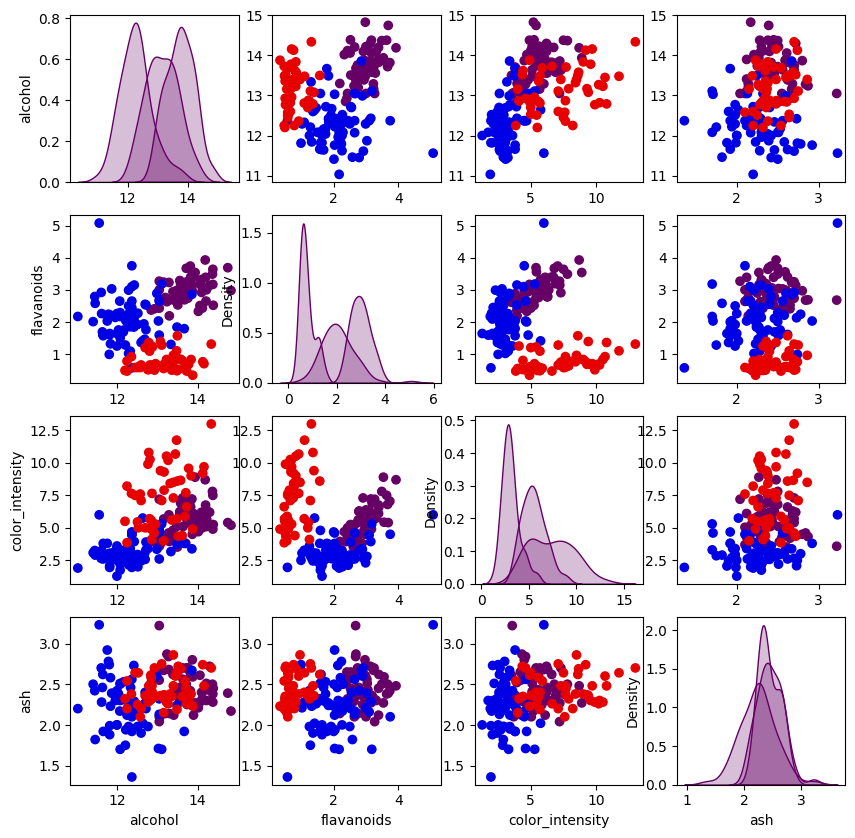

In [45]:
# running the plotting function
myplotGrid(X, y)

### 

### 

### 

### 

### 

### 

### 

### 

### 